# CSCE5320 Scientific Data Visualization Homework 8
Name: Thai Ha Dang 
Student ID: 11761833

## Question 1: Data Visualization with Seaborn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#load data
data = sns.load_dataset('iris')
print(data.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [11]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Text(0.5, 1.02, 'Pair Plot of Iris Dataset')

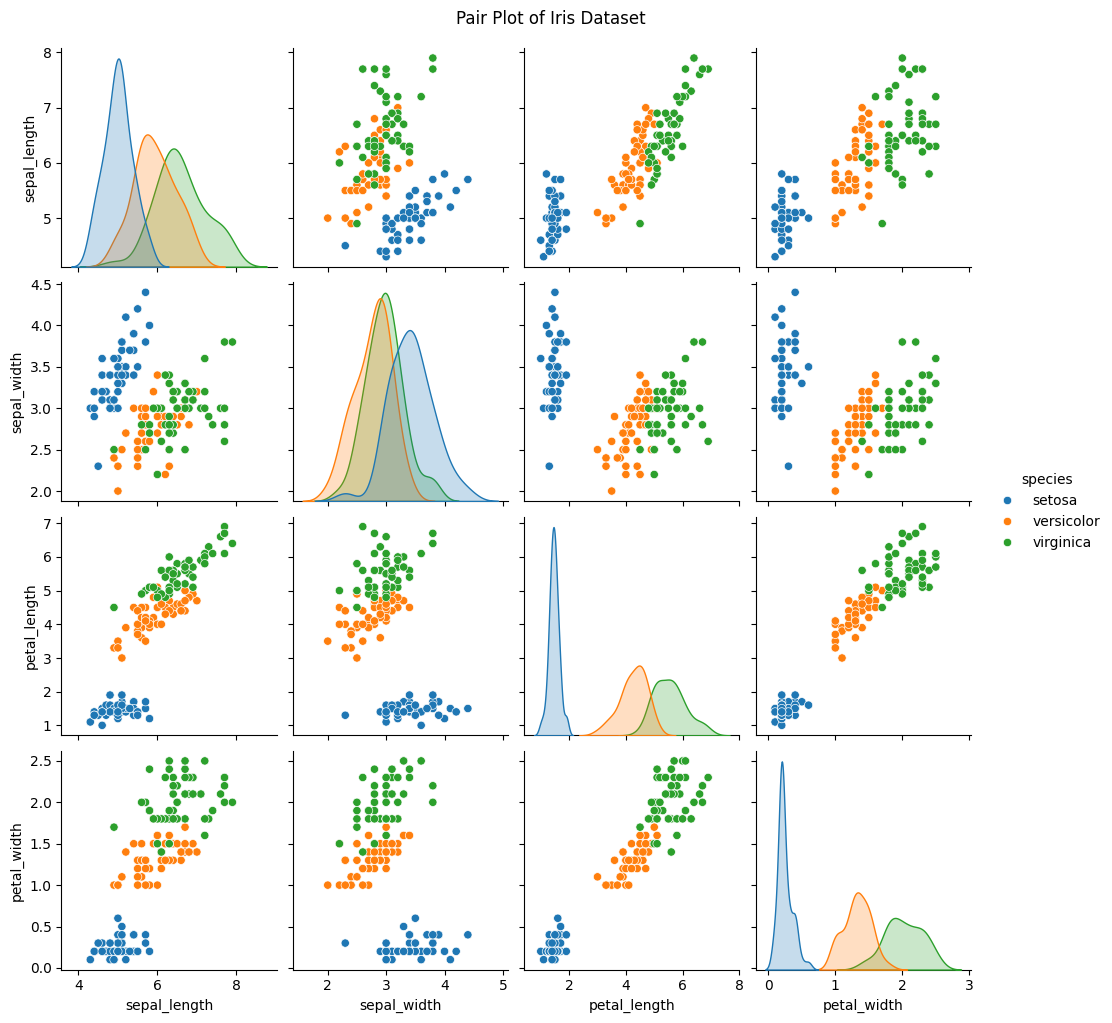

In [3]:
sns.pairplot(data, hue='species')
plt.suptitle('Pair Plot of Iris Dataset', y=1.02)


Interpretation of the Pair Plot: The pair plot shows scatter plots for each pair of features (sepal length, sepal width, petal length, petal width) in the Iris dataset, with different colors indicating species (setosa, versicolor, and virginica). It helps in understanding relationships between features by highlighting which species may be linearly separable based on feature pairs. 

Each diagonal plot shows the distribution of each feature (sepal length, sepal width, petal length, petal width) across the species. The KDE plots on the diagonals allow us to see how the feature values are distributed for each species. Peaks in these curves indicate common values for each feature within a species.

Off-Diagonal Plots (Scatter Plots): The scatter plots display relationships between pairs of features:
Each pair of features (e.g., sepal length vs. sepal width) is plotted to show how they correlate within the species.
Patterns in these scatter plots can reveal which features are useful in distinguishing species.\
Example: "Petal Length vs. Petal Width" Plot\
X-axis (Petal Length) and Y-axis (Petal Width): Each point represents one flower, where the x coordinate corresponds to the petal length, and the y coordinate corresponds to the petal width of that flower.

## Question 2: Customizing Matplotlib Plots

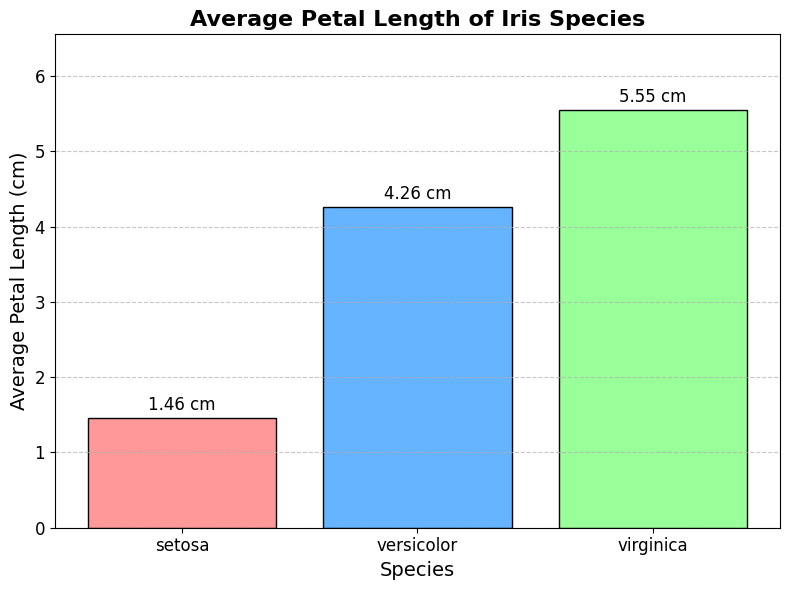

In [4]:
# Calculate the average petal length for each species
avg_petal_length = data.groupby('species')['petal_length'].mean().reset_index()

# Set up the color palette
colors = ['#FF9999', '#66B3FF', '#99FF99']

# Create the bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(avg_petal_length['species'], avg_petal_length['petal_length'], color=colors, edgecolor='black')

# Add titles and labels
plt.title('Average Petal Length of Iris Species', fontsize=16, fontweight='bold')
plt.xlabel('Species', fontsize=14)
plt.ylabel('Average Petal Length (cm)', fontsize=14)

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.05, f'{yval:.2f} cm', ha='center', va='bottom', fontsize=12)

# Customize the plot further
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, max(avg_petal_length['petal_length']) + 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


The bar plot shows the average petal length for each species, indicating that Virginica has the highest average petal length, followed by Versicolor, while Setosa has the shortest average petal length. The color scheme and labels make it easy to distinguish the three species.

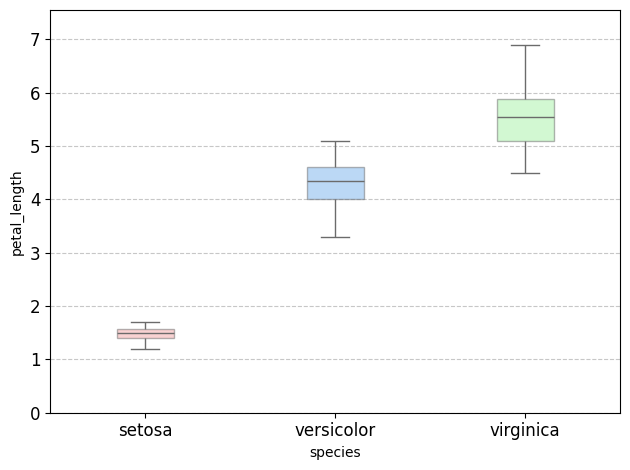

In [6]:
# Overlay a boxplot on top of the bar chart
sns.boxplot(x='species', y='petal_length', data=data, width=0.3, palette=colors,hue='species', fliersize=0, boxprops=dict(alpha=0.5))

# Customize the plot further
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, max(avg_petal_length['petal_length']) + 2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the combined plot
plt.show()

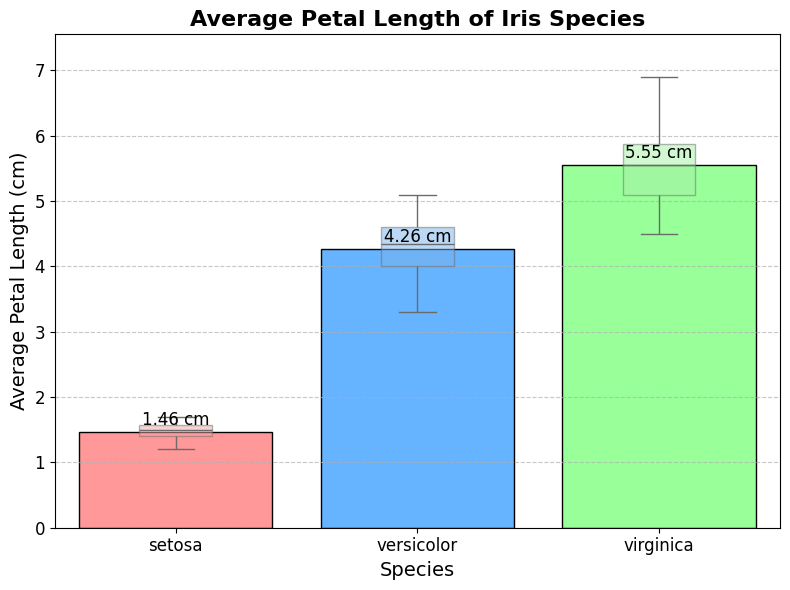

In [8]:
# Create the bar plot
avg_petal_length = data.groupby('species')['petal_length'].mean().reset_index()
plt.figure(figsize=(8, 6))
bars = plt.bar(avg_petal_length['species'], avg_petal_length['petal_length'], color=colors, edgecolor='black')

# Add titles and labels
plt.title('Average Petal Length of Iris Species', fontsize=16, fontweight='bold')
plt.xlabel('Species', fontsize=14)
plt.ylabel('Average Petal Length (cm)', fontsize=14)

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.05, f'{yval:.2f} cm', ha='center', va='bottom', fontsize=12)

# Overlay a boxplot on top of the bar chart
sns.boxplot(x='species', y='petal_length', data=data, width=0.3, palette=colors,hue ='species', fliersize=0, boxprops=dict(alpha=0.5))

# Customize the plot further
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, max(avg_petal_length['petal_length']) + 2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the combined plot
plt.show()

The bar plot shows the average petal length for each species, indicating that Virginica has the highest average petal length, followed by Versicolor, while Setosa has the shortest average petal length. The color scheme and labels make it easy to distinguish the three species.

## Question 3: Principal Component Analysis (PCA)


Principal Component Analysis (PCA) is a dimensionality reduction technique that transforms high-dimensional data into a lower-dimensional space while retaining the variance as much as possible. PCA creates new, uncorrelated variables (principal components) that capture the most significant patterns in the data. This is particularly helpful in visualization, as it allows us to view the primary trends in the data in a reduced number of dimensions.

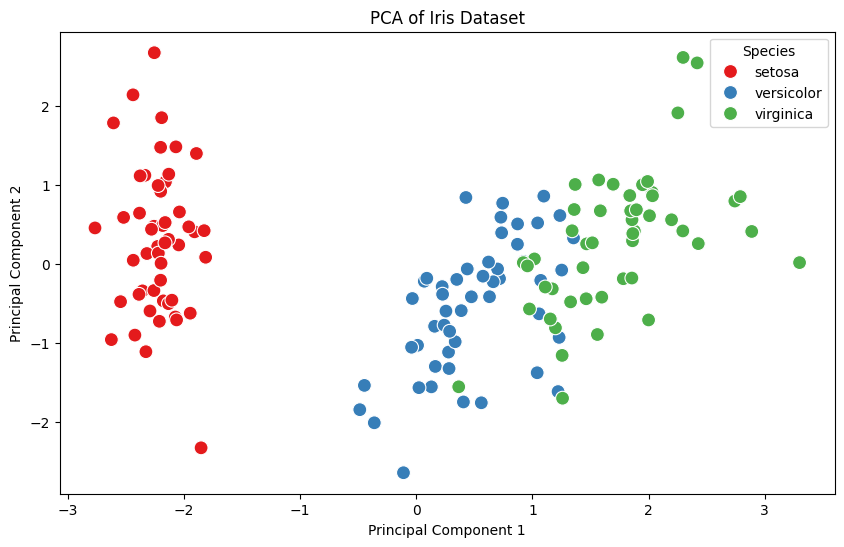

In [9]:
from sklearn.decomposition import PCA

# Standardize the data
features = data.drop('species', axis=1)
features_standardized = (features - features.mean()) / features.std()

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_standardized)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['species'] = data['species']

# Plot the first two principal components
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='species', data=pca_df, palette='Set1', s=100)

# Customize the plot
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Species')
plt.show()

## Question 4: t-Distributed Stochastic Neighbor Embedding (t-SNE)


 t-SNE is a dimensionality reduction technique particularly suited for visualizing high-dimensional data by focusing on preserving local data relationships. Unlike PCA, which optimizes variance, t-SNE optimizes for local similarities, making it effective at separating clusters in a visualization. However, it is computationally more intensive and may vary slightly in output with each run due to random initialization.

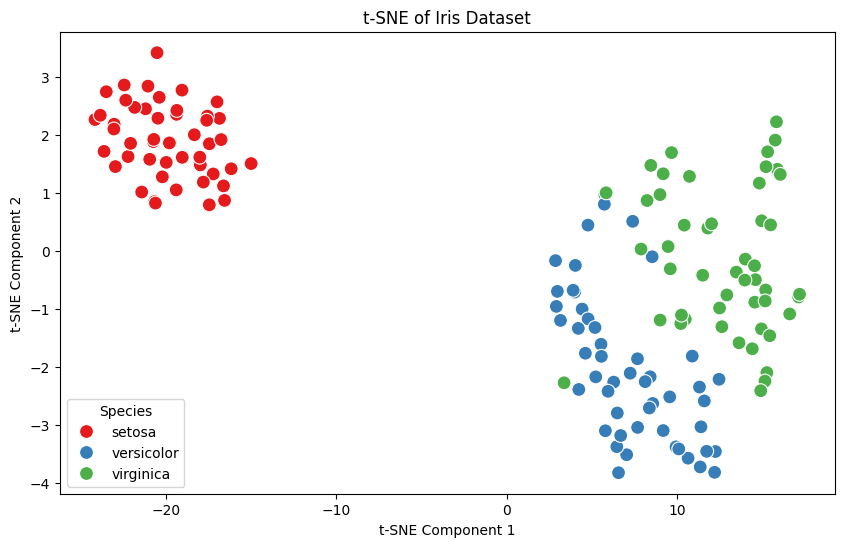

In [10]:
from sklearn.manifold import TSNE

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(features_standardized)

# Create a DataFrame with the t-SNE results
tsne_df = pd.DataFrame(data=tsne_results, columns=['TSNE1', 'TSNE2'])
tsne_df['species'] = data['species']

# Plot the t-SNE results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='species', data=tsne_df, palette='Set1', s=100)

# Customize the plot
plt.title('t-SNE of Iris Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Species')
plt.show()

In contrast to the PCA plot, the t-SNE plot shows more distinct clusters for each species, particularly enhancing the separation between Versicolor and Virginica. This is due to t-SNE’s focus on preserving local structure rather than global variance. While PCA provides a quick and linear overview, t-SNE excels in revealing more complex, non-linear relationships, making it a powerful choice for exploratory data analysis.